# Series

In [18]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

obj = Series([3,6,9,12])

print('Values:{}, index:{}'.format(obj.values, obj.index))

# It is also possible to assign the index to use
ww2_casualties = Series([27000000,23000000,8000000,6000000,400000], index=['USSR','CHINA','GERMANY','JAPAN','USA']) 

# Find countries with more than 4.000.000 casualties
ww2_casualties[ww2_casualties > 4000000]

# Find if a country is in the serie
'SPAIN' in ww2_casualties

# For convenienve might be simpler to work with a dictionary
ww2_dict = ww2_casualties.to_dict()
ww2_dict['USSR']

# And the inverse, map to Serie
Series(ww2_dict)

# You can create a Serie from a dictionary and a list, associating the value contained in the dictionary 
# to the list item, if it doesn't exists it sets null as value
other_serie = Series(ww2_dict, index=['CHINA', 'GERMANY', 'SPAIN'])
print(other_serie)

# You can apply functions to the series like:
print(pd.notnull(other_serie)) # inverse is pd.isnull(other_serie)

# You can label your Serie
ww2_casualties.name = 'World War 2 Casualties'
print(ww2_casualties)

# As well as the index
ww2_casualties.index.name = 'Countries'

# Addition is possible, values are added and stored in the index item
print(ww2_casualties + other_serie)

Values:[ 3  6  9 12], index:RangeIndex(start=0, stop=4, step=1)
CHINA      23000000.0
GERMANY     8000000.0
SPAIN             NaN
dtype: float64
CHINA       True
GERMANY     True
SPAIN      False
dtype: bool
USSR       27000000
CHINA      23000000
GERMANY     8000000
JAPAN       6000000
USA          400000
Name: World War 2 Casualties, dtype: int64
CHINA      46000000.0
GERMANY    16000000.0
JAPAN             NaN
SPAIN             NaN
USA               NaN
USSR              NaN
dtype: float64


# DataFrames

In [55]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import webbrowser

# import data using webbrowser to play with it
# go to website https://en.wikipedia.org/wiki/NFL_win-loss_records' and copy the data in your clipboard

nfl_frame = pd.read_clipboard() # Pandas tries to read what you have copied on your clipboard
print(nfl_frame)

nfl_frame.columns # Returns the list of the columns
nfl_frame.Won # And then it creates an attribute with the name of the column
nfl_frame['Rank'] # Also possible to use it like a dictionary

# You can define a dataframe from other dataframe columns
# If you add a column that does not exists, it populates this new column with nulls
other_df = DataFrame(nfl_frame, columns=['Rank', 'Team', 'Stadium']) 

# Data Retrieval
other_df.head(2) # Gets the top 2 rows
other_df.tail(2) # Returns the bottom 2 rows
other_df.iloc[1] # Returns the row at index 1 (0 based)

other_df['Stadium'] = 'Unknown Stadium' # Data assignment, it assigns Unknown Stadium to all Stadium values
other_df['Stadium'] = np.arange(10) # Also possible to do it with an np array or other arrays

# Same with Series, you can set specific indexes
other_df['Stadium'] = Series(['Cowboys stadium', 'Dolphins arena'], index=[0,4])
del other_df['Stadium'] # Deletes the stadium column


# As with Series, it is also possible to generate a DataFrame from a dictionary
cities =DataFrame({'Cities':['Madrid', 'Barcelona', 'Sevilla'], 'population':[3300000,1600000,900000]})

   Rank                  Team     GP  ...   Pct.  First NFL Season   Division
0     1        Dallas Cowboys    914  ...  0.572              1960   NFC East
1     2     Green Bay Packers  1,368  ...  0.567              1921  NFC North
2     3  New England Patriots    916  ...  0.564              1960   AFC East
3     4         Chicago Bears  1,402  ...  0.563              1920  NFC North
4     5      Baltimore Ravens    384  ...  0.559              1996  AFC North
5     6        Miami Dolphins    832  ...  0.552              1966   AFC East
6     7     Minnesota Vikings    902  ...  0.547              1961  NFC North
7     8   San Francisco 49ers  1,034  ...  0.534              1950   NFC West
8     9       New York Giants  1,337  ...  0.533              1925   NFC East
9    10        Denver Broncos    916  ...  0.533              1960   AFC West

[10 rows x 9 columns]


,Cities,population
0,Madrid,3300000
1,Barcelona,1600000
2,Sevilla,900000


In [67]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame


ww2_casualties = Series([27000000,23000000,8000000,6000000,400000], index=['USSR','CHINA','GERMANY','JAPAN','USA']) 
 # This is an index with similar functions like arrays
print(ww2_casualties.index[3:])

ww2_casualties.index[4] = 'PORTUGAL' # it is not possible to mutate an index, unless you use reindexing

Index(['JAPAN', 'USA'], dtype='object')


TypeError: Index does not support mutable operations

In [77]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn

ww2_casualties = Series([27000000,23000000,8000000,6000000,400000], index=['USSR','CHINA','GERMANY','JAPAN','USA']) 
#If index value does not exists, it is set to null, but can be set to a default value with
ww2_casualties.reindex(['RUS','CHN','GER','JPN','USA','ARG','ITA'], fill_value=0)
print(ww2_casualties)

ser = Series(['USA','MEXICO','CANADA'], index=[0,5,10])
print(ser.reindex(range(15)))
# It is possible to use different method to reindex and fill values, in this case ffill means forward fill
print(ser.reindex(range(15), method='ffill'))

USSR       27000000
CHINA      23000000
GERMANY     8000000
JAPAN       6000000
USA          400000
dtype: int64
0        USA
1        NaN
2        NaN
3        NaN
4        NaN
5     MEXICO
6        NaN
7        NaN
8        NaN
9        NaN
10    CANADA
11       NaN
12       NaN
13       NaN
14       NaN
dtype: object
0        USA
1        USA
2        USA
3        USA
4        USA
5     MEXICO
6     MEXICO
7     MEXICO
8     MEXICO
9     MEXICO
10    CANADA
11    CANADA
12    CANADA
13    CANADA
14    CANADA
dtype: object


In [89]:
dframe = DataFrame(randn(25).reshape((5,5)), index=['A','B','D','E','F'],
                   columns= ['col-1','col-2','col-3','col-4','col-5'])
# We forgot column C so we reindex, values of the 3rd colum will still be assigned to D as they were
# originally assigned, row 'C' will be filled with nulls unless we pass a default value
dframe2 =dframe.reindex(index=['A','B','C','D','E','F'])
print(dframe2)

# we can also reindex columns, as with the rows, previously non-existing columns will be filled with nulls
dframe2.reindex(columns=['col-1','col-2','col-3','col-4','col-5', 'col-6'])

      col-1     col-2     col-3     col-4     col-5
A  0.552209  0.208672  0.163548  0.044633  0.971535
B  0.976579  0.689836  1.120965  0.252002 -2.379984
C       NaN       NaN       NaN       NaN       NaN
D -0.489085  0.768643  0.450048  1.226765  0.217771
E  0.416990  0.482480  0.659299  0.039197  1.333168
F  0.130276  0.273627  0.524254  1.035701  0.968843


,col-1,col-2,col-3,col-4,col-5,col-6
A,0.552209,0.208672,0.163548,0.044633,0.971535,NaN
B,0.976579,0.689836,1.120965,0.252002,-2.379984,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN
D,-0.489085,0.768643,0.450048,1.226765,0.217771,NaN
E,0.416990,0.482480,0.659299,0.039197,1.333168,NaN
F,0.130276,0.273627,0.524254,1.035701,0.968843,NaN


## Dropping Series and Dataframes

In [97]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn

serie1 = Series(np.arange(3), ['A','B','C'])

# To drop an index, just call drop on your serie and pass the object to drop 'index label'
serie1.drop('A')

dframe1 = DataFrame(np.arange(9).reshape([3,3]), index=['SF','NY','LA'], columns=['pop','size','year'])

# Similar than with series, to drop a column or row on a dataframe, pass the object to drop
# Drop does not modify the original dataframe
print(dframe1.drop('LA')) # Drop a Row
print(dframe1.drop('year', axis=1)) # Axis 0 represents X axis, and it is the default, like the above, axis 1 is y



    pop  size  year
SF    0     1     2
NY    3     4     5
    pop  size
SF    0     1
NY    3     4
LA    6     7


## Selecting Series and Dataframes

In [119]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn

serie1 = Series(np.arange(3), ['A','B','C'])
serie2 = 2*serie1

# Selecting values can be done 
print(serie2['B']) # by index 
print(serie2[1]) # by numerical value
print(serie2[1:]) # by slice
print(serie2[serie2 >1 ]) # by condition 
# We can use condition to this can also be used to set values)

dframe1 = DataFrame(np.arange(9).reshape([3,3]), index=['SF','NY','LA'], columns=['pop','size','year'])
print(dframe1.loc['SF']) # by row
print(dframe1[['pop', 'year']]) # by column
print(dframe1[dframe1['pop'] >4]) # by condition

2
2
B    2
C    4
dtype: int64
B    2
C    4
dtype: int64
pop     0
size    1
year    2
Name: SF, dtype: int64
    pop  year
SF    0     2
NY    3     5
LA    6     8
    pop  size  year
LA    6     7     8


# Data Alignment

In [10]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

ser1 = Series([0,1,2], index=['A','B','C'])
ser2 = Series([3,4,5,6], index=['A','B','C','D'])

print(ser1 + ser2) # When the series doesn't have a value matching it sets it up to NaN
print(ser1.add(ser2, fill_value=0)) # This puts a 0 in the dFrame1 values that are not filled

dFrame1 = DataFrame(np.arange(4).reshape((2,2)), columns=list('AB'), index=['LA','NY'])
dFrame2 = DataFrame(np.arange(9).reshape((3,3)), columns=list('ABC'), index=['LA','NY','SF'])

print(dFrame1+dFrame2)
print(dFrame1.add(dFrame2, fill_value=0)) # This puts a 0 in the dFrame1 values that are not filled

print(dFrame1-ser1) # It is possible to do arithmetic operations with DataFrames and Series if they share labels

A    3.0
B    5.0
C    7.0
D    NaN
dtype: float64
A    3.0
B    5.0
C    7.0
D    6.0
dtype: float64
      A    B   C
LA  0.0  2.0 NaN
NY  5.0  7.0 NaN
SF  NaN  NaN NaN
      A    B    C
LA  0.0  2.0  2.0
NY  5.0  7.0  5.0
SF  6.0  7.0  8.0
    A  B   C
LA  0  0 NaN
NY  2  2 NaN


## Ranking and Sorting

In [21]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn

ser1 = Series([0,2,1], index=['C','A','B'])
print(ser1.sort_index()) # Sort the series using the index, the original series remain unchanged

ser2 = Series(randn(10)).sort_values()
print(ser2) # Sort the series using the values, the original series remain unchanged
print(ser2.rank()) # Creates a Serie with value being the index and index being the rank


A    2
B    1
C    0
dtype: int64
6   -2.437268
2   -1.004940
5   -0.869345
3    0.036335
9    0.155938
7    0.471115
0    0.473356
4    0.705921
8    1.116581
1    1.241325
dtype: float64
6     1.0
2     2.0
5     3.0
3     4.0
9     5.0
7     6.0
0     7.0
4     8.0
8     9.0
1    10.0
dtype: float64


## Summary Statistics

     A    B    C
A  1.0  2.0  NaN
B  NaN  5.0  6.0
A    1.0
B    7.0
C    6.0
dtype: float64
A     3.0
B    11.0
dtype: float64
Minimum value in the DF:
A    1.0
B    2.0
C    6.0
dtype: float64, 
maxium:
A    1.0
B    5.0
C    6.0
dtype: float64
Minimum value in the DF occurred in the column:A    A
B    A
C    B
dtype: object
     A    B    C
A  1.0  2.0  NaN
B  NaN  7.0  6.0
         A        B    C
count  1.0  2.00000  1.0
mean   1.0  3.50000  6.0
std    NaN  2.12132  NaN
min    1.0  2.00000  6.0
25%    1.0  2.75000  6.0
50%    1.0  3.50000  6.0
75%    1.0  4.25000  6.0
max    1.0  5.00000  6.0
     A    B    C
A  1.0  2.0  NaN
B  NaN  5.0  6.0


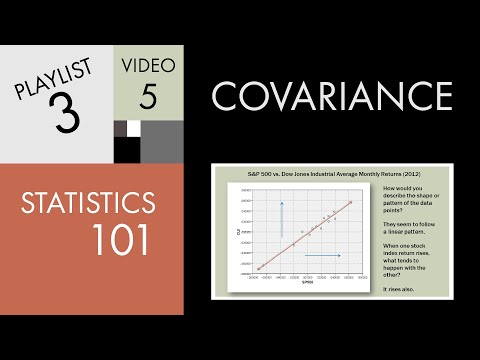

In [40]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df1 = DataFrame(np.array([[1,2,np.NaN], [np.NaN,5,6]]), index=list('AB'), columns=['A','B','C'])
print(df1)

print(df1.sum()) # Sums all the values per column in the DataFrame ignoring nulls (axis default to x=0)
print(df1.sum(axis=1)) # Sums all the values per row in the DataFrame
print('Minimum value in the DF:\n{}, \nmaxium:\n{}'.format(df1.min(), df1.max()))
print('Minimum value in the DF occurred in the column:{}'.format(df1.idxmin()))
print(df1.cumsum()) # Acumulation sum, row 1 is sum with row 2 and the result is sum in row 3 and so on and on...
print(df1.describe()) # Provides summary statistics in your dataframe
print(df1) # correlation and covariance in your dataframe


AttributeError: 'Series' object has no attribute 'value_count'

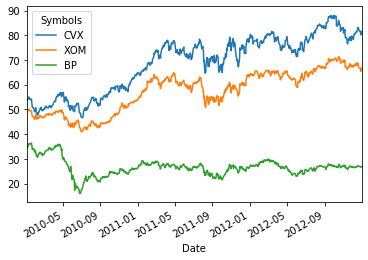

In [28]:
import numpy as np
import pandas as pd
from IPython.display import display
from pandas import Series, DataFrame
from IPython.display import YouTubeVideo
from pandas_datareader import data as pdweb
import datetime

# 
YouTubeVideo('xGbpuFNR1ME')

prices = pdweb.get_data_yahoo(['CVX','XOM','BP'], start=datetime.datetime(2010,1,1),end=datetime.datetime(2013,1,1))['Adj Close']

volume = pdweb.get_data_yahoo(['CVX','XOM','BP'],  start=datetime.datetime(2010,1,1),end=datetime.datetime(2013,1,1))['Volume']

rets = prices.pct_change() # Returns the percentage change in prices for the dates

# Correlations of the stocks
corr = rets.corr

%matplotlib inline
prices.plot()

ser1 = Series(['w','w','x','y','z','w','x','a'])
ser1.unique() # Returns unique records
ser1.value_counts() # Returns the number of each values

## Missing Data

In [40]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

data = Series(['one', 'two', np.NaN, 'four'])
print(data.isnull()) # Tells you which data is missing
print(data.dropna()) # Removes null values

dframe = DataFrame([[1,2,3],[np.NaN,5,6],[7,np.nan,9],[np.nan,np.nan,np.nan]])
print(dframe)              
print(dframe.dropna()) # removes rows that has null values
print(dframe.dropna(how='all')) # removes rows that has all null values
print(dframe.dropna(thresh=2)) # removes rows that has at least 2 values
print(dframe.fillna(-1)) # Fills the null values with -1
print(dframe.fillna({0:-1,1:0,2:0,3:-1})) # Fills the null values with different values depending on the column index
dframe.fillna(-1, inplace=True) # Fills the null values with 0 in place
print(dframe)

0    False
1    False
2     True
3    False
dtype: bool
0     one
1     two
3    four
dtype: object
     0    1    2
0  1.0  2.0  3.0
1  NaN  5.0  6.0
2  7.0  NaN  9.0
3  NaN  NaN  NaN
     0    1    2
0  1.0  2.0  3.0
     0    1    2
0  1.0  2.0  3.0
1  NaN  5.0  6.0
2  7.0  NaN  9.0
     0    1    2
0  1.0  2.0  3.0
1  NaN  5.0  6.0
2  7.0  NaN  9.0
     0    1    2
0  1.0  2.0  3.0
1 -1.0  5.0  6.0
2  7.0 -1.0  9.0
3 -1.0 -1.0 -1.0
     0    1    2
0  1.0  2.0  3.0
1 -1.0  5.0  6.0
2  7.0  0.0  9.0
3 -1.0  0.0  0.0
     0    1    2
0  1.0  2.0  3.0
1 -1.0  5.0  6.0
2  7.0 -1.0  9.0
3 -1.0 -1.0 -1.0


## Index Hierarchy

In [68]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn

ser = Series(randn(6), index=[[1,1,1,2,2,2],['a','b','c','a','b','c']]) # creates two index levels
print(ser)
print(ser.index) 
print(ser[1]) # Returns the values corresponding to the value 1 of the first index
print(ser[2]) # Returns the values corresponding to the value 2 of the first index
print(ser[:,'a']) # Returns the values corresponding to the value 'a' of the second index

print(ser.unstack()) # Reshapes the serie into a matrix
df = DataFrame(np.arange(16).reshape((4,4)), index=[list('BACD'),  [1,2,1,2]], 
                    columns=[['LA','NY','NY','TX'],[1,1,2,2]])

# To keep track of the levels you can name your indexes
df.index.names = ['INDEX_1','INDEX_2']
df.columns.names = ['CITIES', 'ORDER']
print(df) # Similar to series, there is a hierarchy of nested index

df.swaplevel('ORDER','CITIES',  axis=1) # Swaps the level of two indexes
print(df)

print(df.sort_index(1)) # sort the level index at position 1
print(df.sum(level='ORDER', axis=1)) # Accumulate sum on the order column (axis 1)

1  a    0.926089
   b   -0.195358
   c   -1.137102
2  a   -1.410445
   b   -0.478555
   c   -0.128981
dtype: float64
MultiIndex([(1, 'a'),
            (1, 'b'),
            (1, 'c'),
            (2, 'a'),
            (2, 'b'),
            (2, 'c')],
           )
a    0.926089
b   -0.195358
c   -1.137102
dtype: float64
a   -1.410445
b   -0.478555
c   -0.128981
dtype: float64
1    0.926089
2   -1.410445
dtype: float64
          a         b         c
1  0.926089 -0.195358 -1.137102
2 -1.410445 -0.478555 -0.128981
CITIES           LA  NY      TX
ORDER             1   1   2   2
INDEX_1 INDEX_2                
B       1         0   1   2   3
A       2         4   5   6   7
C       1         8   9  10  11
D       2        12  13  14  15
CITIES           LA  NY      TX
ORDER             1   1   2   2
INDEX_1 INDEX_2                
B       1         0   1   2   3
A       2         4   5   6   7
C       1         8   9  10  11
D       2        12  13  14  15
CITIES           LA  NY      TX
ORDE